In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
default_df = pd.read_excel(f"C:\\Users\\DELL\\Desktop\\kaggle\\UCI_Credit_Card.xlsx")

In [3]:
default_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
print(f"Data has{default_df.shape[0]} and rows {default_df.shape[1]} columns")

Data has30000 and rows 25 columns


In [5]:
default_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
default_df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
sample_default = default_df.iloc[:,0:10]

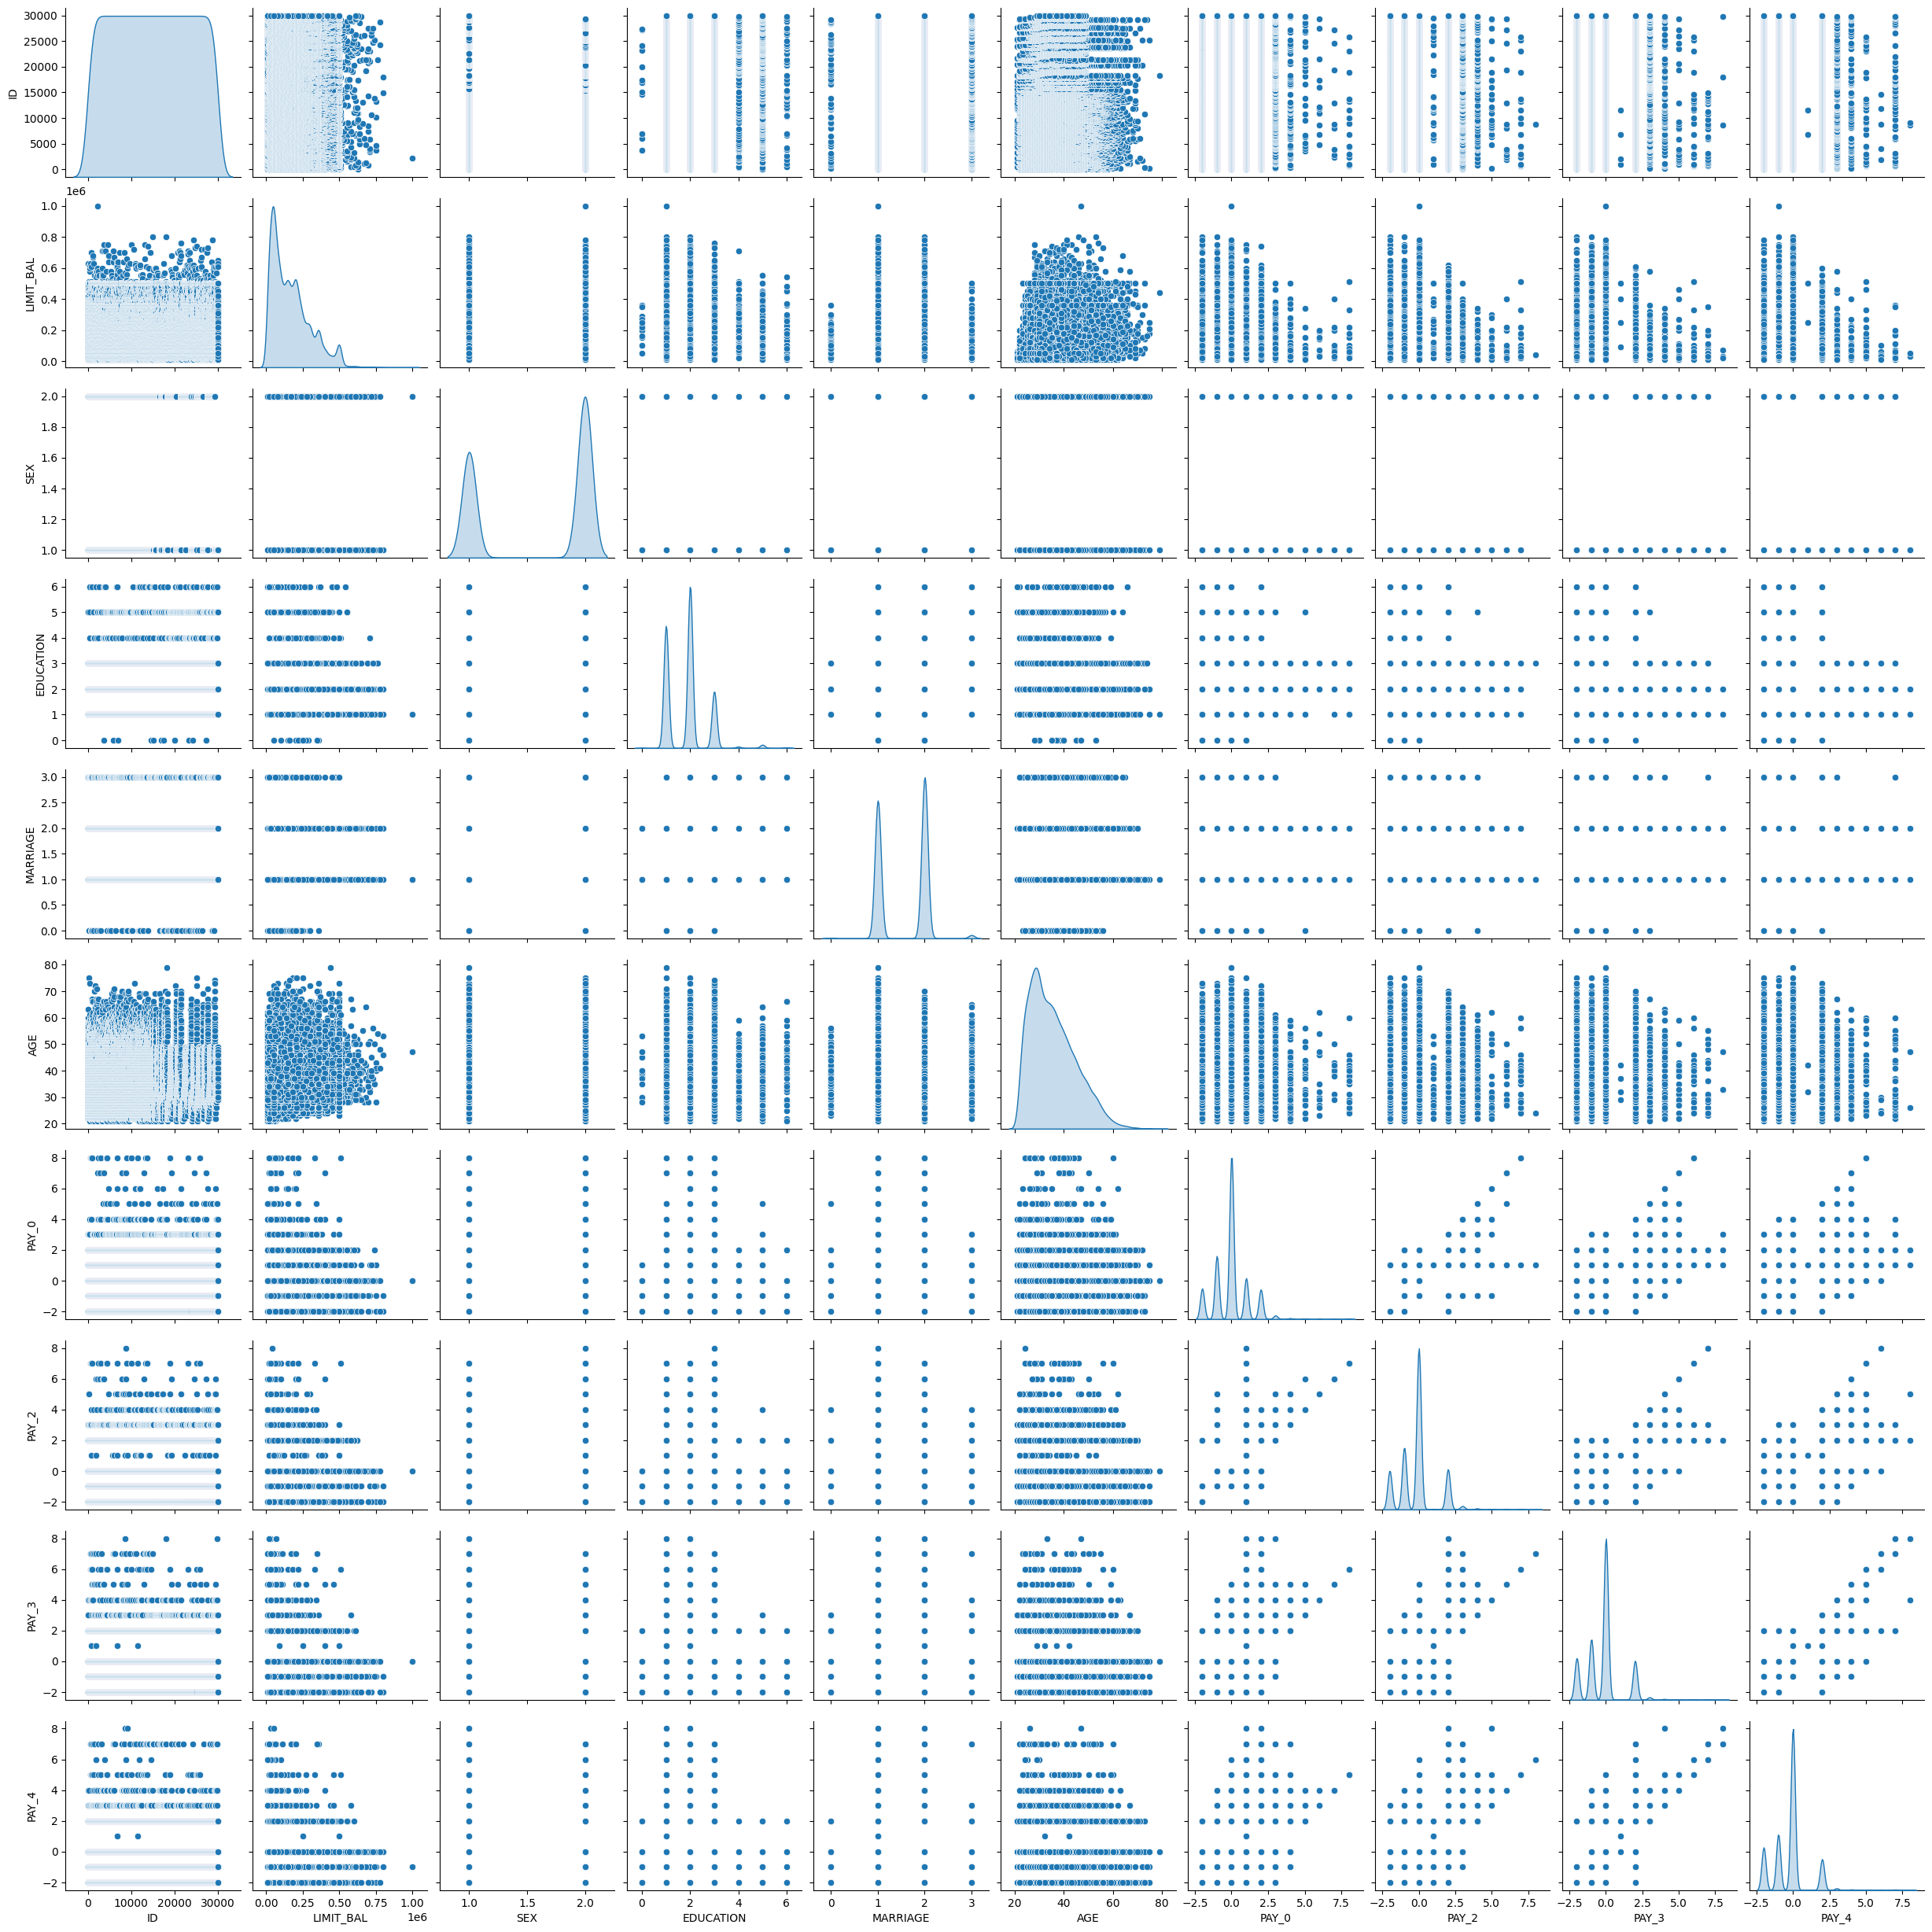

In [9]:
sns.pairplot(sample_default, diag_kind = 'kde')

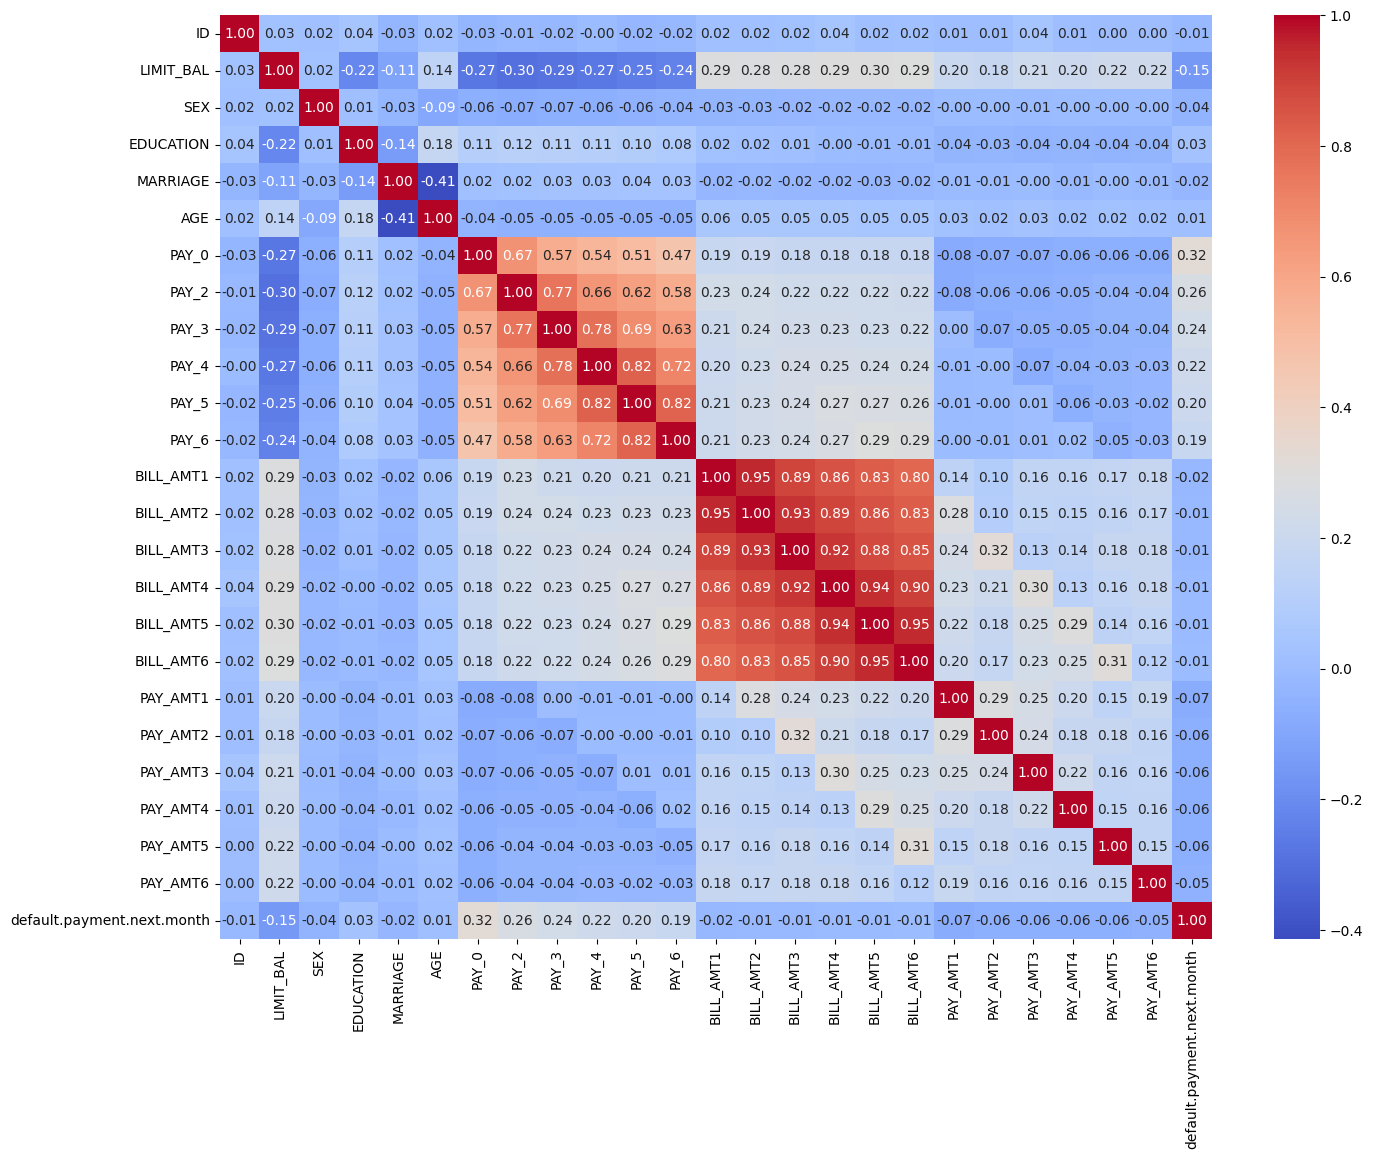

In [10]:
plt.figure(figsize=(16, 12))
sns.heatmap(default_df.corr(), annot=True, cmap='coolwarm', fmt=".2f");

In [11]:
print(default_df.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')


In [12]:
default_df.columns = default_df.columns.str.strip()

In [13]:
x = default_df.drop("default.payment.next.month", axis=1)
y = default_df["default.payment.next.month"]

In [14]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=1, stratify=y)

In [17]:
import pandas as pd
scaler = StandardScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_test_scaled = pd.DataFrame(scaler.fit_transform(x_test), columns = x_test.columns)

In [18]:
log = LogisticRegression(max_iter = 1000)
log.fit(x_train_scaled, y_train)
log_train_pred = log.predict(x_train_scaled)
log_pred = log.predict(x_test_scaled)

In [19]:
print(classification_report(log_train_pred, y_train))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89     19426
           1       0.24      0.72      0.36      1574

    accuracy                           0.81     21000
   macro avg       0.61      0.77      0.63     21000
weighted avg       0.92      0.81      0.85     21000



In [20]:
print(confusion_matrix(log_train_pred, y_train))

[[15908  3518]
 [  447  1127]]


In [21]:
print(classification_report(log_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      8319
           1       0.24      0.70      0.36       681

    accuracy                           0.81      9000
   macro avg       0.61      0.76      0.62      9000
weighted avg       0.92      0.81      0.85      9000



In [22]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'gini')
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [23]:
from sklearn import tree
train_char_label = ['NO','YES']

In [24]:
print(pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = x_train.columns))

                Imp
ID         0.093686
LIMIT_BAL  0.046459
SEX        0.010385
EDUCATION  0.018792
MARRIAGE   0.011403
AGE        0.066188
PAY_0      0.163800
PAY_2      0.035450
PAY_3      0.008089
PAY_4      0.012948
PAY_5      0.006016
PAY_6      0.009456
BILL_AMT1  0.053466
BILL_AMT2  0.044075
BILL_AMT3  0.036781
BILL_AMT4  0.040554
BILL_AMT5  0.038348
BILL_AMT6  0.047237
PAY_AMT1   0.041674
PAY_AMT2   0.040361
PAY_AMT3   0.051851
PAY_AMT4   0.035527
PAY_AMT5   0.036569
PAY_AMT6   0.050887


In [25]:
y_predict = dt_model.predict(x_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      7009
           1       0.38      0.40      0.39      1991

    accuracy                           0.72      9000
   macro avg       0.60      0.61      0.60      9000
weighted avg       0.73      0.72      0.72      9000



In [27]:
reg_dt_model = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_leaf=10, min_samples_split=25)
reg_dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=25)

In [28]:
ytrain_predict = reg_dt_model.predict(x_train)
ytest_predict = reg_dt_model.predict(x_test)

In [29]:
print(classification_report(y_train, ytrain_predict))
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     16355
           1       0.71      0.39      0.50      4645

    accuracy                           0.83     21000
   macro avg       0.78      0.67      0.70     21000
weighted avg       0.82      0.83      0.81     21000

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7009
           1       0.64      0.36      0.46      1991

    accuracy                           0.81      9000
   macro avg       0.74      0.65      0.68      9000
weighted avg       0.79      0.81      0.79      9000



In [30]:
from sklearn.metrics import roc_curve, roc_auc_score

In [31]:
ytrain_proba = reg_dt_model.predict_proba(x_train)[:,1]
ytest_proba = reg_dt_model.predict_proba(x_test)[:,1]

In [32]:
train_auc = roc_auc_score(y_train, ytrain_proba)
test_auc = roc_auc_score(y_test, ytest_proba)

In [33]:
print("Training AUC:", train_auc)
print("Test AUC:", test_auc)

Training AUC: 0.784510466279162
Test AUC: 0.7552507470663211


In [34]:
fpr_train, tpr_train,_ = roc_curve(y_train, ytrain_proba)
fpr_test, tpr_test,_ = roc_curve(y_test, ytest_proba)

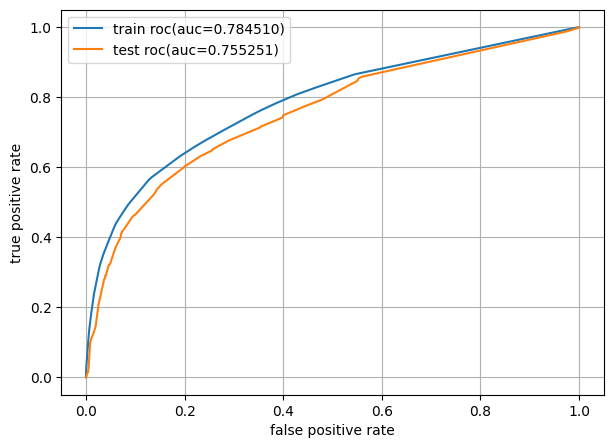

In [37]:
plt.figure(figsize=(7,5))
plt.plot(fpr_train, tpr_train, label=f'train roc(auc={train_auc:2f})')
plt.plot(fpr_test, tpr_test, label=f'test roc(auc={test_auc:2f})')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.grid()
plt.show()
         